## Import libraries

In [17]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

import requests
from bs4 import BeautifulSoup

import h5py

years = range(2014, 2025)

## Download netcdf files

In [2]:
root_dir = "D:/IceDyno/netcdf"
for yr in years:
    print(f"Downloading files for {yr}")
    save_dir = f"{root_dir}/{yr}/"
    os.makedirs(save_dir, exist_ok=True)

    html_page = f"https://noaadata.apps.nsidc.org/NOAA/G02186/netcdf/1km/{yr}/"
    response = requests.get(html_page)

    try:
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            links = soup.find_all("a")
            file_cnt = 0
            for link in links:
                href = link.get("href")
                if ".nc" in href:
                    download_url = f"{html_page}/{link['href']}"
                    response = requests.get(download_url, stream=True)
                    response.raise_for_status()

                    file_name = f"{save_dir}{os.path.basename(download_url)}"

                    with open(file_name, "wb") as file:
                        for chunk in response.iter_content(chunk_size=512):
                            file.write(chunk)

                    file_cnt += 1
                    if file_cnt % 50 == 0:
                        print(f"Downloading files for {yr}: [{file_cnt}]")

    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")

    print(f"Total downloaded files for {yr}: [{file_cnt}]\n")

Total downloaded files for 2014: [30]

Total downloaded files for 2015: [364]

Total downloaded files for 2016: [366]

Total downloaded files for 2017: [363]

Total downloaded files for 2018: [365]

Total downloaded files for 2019: [365]

Total downloaded files for 2020: [366]

Total downloaded files for 2021: [363]

Total downloaded files for 2022: [365]

Total downloaded files for 2023: [364]

Total downloaded files for 2024: [56]



## Show example

Unique values in HDF file [0 1 2 3 4 5]


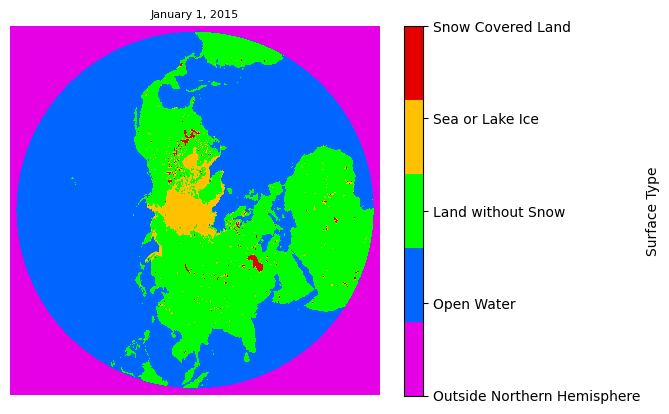

Total HDF keys: ['_nc4_non_coord_y', 'polar_stereographic', 'sea_ice_extent', 'time', 'x', 'y']


In [20]:
# Define a custom colormap with five colors
# (Colors used from IMS product map)
"""
0 (outside Northern Hemisphere).
1 (open water)
2 (land without snow)
3 (sea or lake ice)
4 (snow covered land)
"""
colors = ["#E500E5", "#0066FF", "#01FF00", "#FFC100", "#E50000"]
cmap = ListedColormap(colors, name="custom_colormap", N=len(colors))

with h5py.File(f"{root_dir}/2015/masie_all_r00_v01_2015001_1km.nc", "r") as file:
    sie = file["sea_ice_extent"]
    print(f"Unique values in HDF file {np.unique(sie)}")

    # Plot
    plt.imshow(sie[0], cmap=cmap, vmin=0, vmax=len(colors) - 1)
    plt.title("January 1, 2015", fontsize=8)
    plt.axis("off")

    cbar = plt.colorbar(ticks=np.arange(len(colors)))
    cbar.ax.set_yticklabels(
        [
            "Outside Northern Hemisphere",
            "Open Water",
            "Land without Snow",
            "Sea or Lake Ice",
            "Snow Covered Land",
        ]
    )
    cbar.set_label("Surface Type")

    plt.show()

    keys = list(file.keys())
    print(f"Total HDF keys: {keys}")